# 1. 設置路徑 (Setup Paths)

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 2. 從 Tensorflow Model Zoo 下載 TF Models Pretrained Models 並安裝 TFOD。

Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [ ]:
# https://www.tensorflow.org/install/source_windows

In [6]:
if os.name=='nt':
    !pip install wget
    import wget

In [7]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 71516, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 71516 (delta 24), reused 58 (delta 19), pack-reused 71451
Receiving objects: 100% (71516/71516), 578.88 MiB | 272.00 KiB/s, done.
Resolving deltas: 100% (50557/50557), done.
Updating files: 100% (3009/3009), done.


In [8]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

/bin/bash: apt-get: command not found
Processing /Users/admin/tensorflow/checkface/Tensorflow/models/research
  Preparing metadata (setup.py) ... done
  Using cached avro_python3-1.10.2-py3-none-any.whl
  Using cached apache_beam-2.37.0-cp38-cp38-macosx_10_9_x86_64.whl (4.4 MB)
  Using cached Pillow-9.0.1-cp38-cp38-macosx_10_10_x86_64.whl (3.0 MB)
  Using cached matplotlib-3.5.1-cp38-cp38-macosx_10_9_x86_64.whl (7.3 MB)
  Using cached Cython-0.29.28-py2.py3-none-any.whl (983 kB)
  Using cached contextlib2-21.6.0-py2.py3-none-any.whl (13 kB)
  Using cached tf_slim-1.1.0-py2.py3-none-any.whl (352 kB)
  Using cached pycocotools-2.0.4-cp38-cp38-macosx_10_9_x86_64.whl
  Using cached lvis-0.5.3-py3-none-any.whl (14 kB)
  Using cached scipy-1.8.0-cp38-cp38-macosx_12_0_universal2.macosx_10_9_x86_64.whl (55.3 MB)
  Using cached pandas-1.4.1-cp38-cp38-macosx_10_9_x86_64.whl (11.4 MB)
  Using cached tf_models_official-2.8.0-py2.py3-none-any.whl (2.2 MB)
  Using cached tensorflow_io-0.24.0-cp38-cp

  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
  Using cached libclang-13.0.0-py2.py3-none-macosx_10_9_x86_64.whl (13.0 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached h5py-3.6.0-cp38-cp38-macosx_10_9_x86_64.whl (3.1 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached wrapt-1.14.0-cp38-cp38-macosx_10_9_x86_64.whl (35 kB)
  Using cached dm_tree-0.1.6-cp38-cp38-macosx_10_14_x86_64.whl (95 kB)
  Using cached portalocker-2.4.0-py2.py3-none-any.whl (16 kB)
  Using cached regex-2022.3.15-cp38-cp38-macosx_10_9_x86_64.whl (289 kB)
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Using cached colorama-0.4.4-py2.py3-none-any.whl (16 kB)
  Using cached scikit_learn-1.0.2-cp38-cp38-macosx_10_13_x86_64.whl (7.9 MB)
  Using cached typeguard-2.1

In [9]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.8.7: /Users/admin/tensorflow/checkface/tfod/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-03-29 14:11:08.769849: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/admin/tensorflow/checkface/tfod/lib/python3.8/site-packages/object_detection/builders/model_builder.py:1100: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W0329 14:11:09.145383 4592328192 model_builder.py:1100] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.83s
I0329 14:11:09.589621 4592328192 test_util

I0329 14:11:16.847208 4592328192 efficientnet_model.py:144] round_filter input=40 output=40
I0329 14:11:16.847380 4592328192 efficientnet_model.py:144] round_filter input=80 output=80
I0329 14:11:17.409472 4592328192 efficientnet_model.py:144] round_filter input=80 output=80
I0329 14:11:17.409662 4592328192 efficientnet_model.py:144] round_filter input=112 output=112
I0329 14:11:17.717511 4592328192 efficientnet_model.py:144] round_filter input=112 output=112
I0329 14:11:17.717684 4592328192 efficientnet_model.py:144] round_filter input=192 output=192
I0329 14:11:18.263707 4592328192 efficientnet_model.py:144] round_filter input=192 output=192
I0329 14:11:18.263898 4592328192 efficientnet_model.py:144] round_filter input=320 output=320
I0329 14:11:18.389176 4592328192 efficientnet_model.py:144] round_filter input=1280 output=1280
I0329 14:11:18.457862 4592328192 efficientnet_model.py:454] Building model efficientnet with params ModelConfig(width_coefficient=1.0, depth_coefficient=1.0, 

I0329 14:11:24.105674 4592328192 efficientnet_model.py:454] Building model efficientnet with params ModelConfig(width_coefficient=1.1, depth_coefficient=1.2, resolution=260, dropout_rate=0.3, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=24, output_filters=40, kernel_size=5, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=40, output_filters=80, kernel_size=3, num_repeat=3, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=80, output_filters=112, kernel_size=5, num_repeat=

I0329 14:11:31.814166 4592328192 ssd_efficientnet_bifpn_feature_extractor.py:145] EfficientDet EfficientNet backbone version: efficientnet-b5
I0329 14:11:31.814388 4592328192 ssd_efficientnet_bifpn_feature_extractor.py:147] EfficientDet BiFPN num filters: 288
I0329 14:11:31.814525 4592328192 ssd_efficientnet_bifpn_feature_extractor.py:148] EfficientDet BiFPN num iterations: 7
I0329 14:11:31.816902 4592328192 efficientnet_model.py:144] round_filter input=32 output=48
I0329 14:11:31.835906 4592328192 efficientnet_model.py:144] round_filter input=32 output=48
I0329 14:11:31.836095 4592328192 efficientnet_model.py:144] round_filter input=16 output=24
I0329 14:11:32.079752 4592328192 efficientnet_model.py:144] round_filter input=16 output=24
I0329 14:11:32.079926 4592328192 efficientnet_model.py:144] round_filter input=24 output=40
I0329 14:11:32.656008 4592328192 efficientnet_model.py:144] round_filter input=24 output=40
I0329 14:11:32.656200 4592328192 efficientnet_model.py:144] round_fil

I0329 14:11:44.484714 4592328192 efficientnet_model.py:144] round_filter input=24 output=48
I0329 14:11:44.484904 4592328192 efficientnet_model.py:144] round_filter input=40 output=80
I0329 14:11:45.470223 4592328192 efficientnet_model.py:144] round_filter input=40 output=80
I0329 14:11:45.470563 4592328192 efficientnet_model.py:144] round_filter input=80 output=160
I0329 14:11:47.183631 4592328192 efficientnet_model.py:144] round_filter input=80 output=160
I0329 14:11:47.183804 4592328192 efficientnet_model.py:144] round_filter input=112 output=224
I0329 14:11:48.532643 4592328192 efficientnet_model.py:144] round_filter input=112 output=224
I0329 14:11:48.532834 4592328192 efficientnet_model.py:144] round_filter input=192 output=384
I0329 14:11:50.576012 4592328192 efficientnet_model.py:144] round_filter input=192 output=384
I0329 14:11:50.576189 4592328192 efficientnet_model.py:144] round_filter input=320 output=640
I0329 14:11:51.410223 4592328192 efficientnet_model.py:144] round_fi

In [ ]:
!pip install tensorflow --upgrade

In [ ]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

In [10]:
import object_detection

In [ ]:
!pip list

In [11]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2022-03-29 14:13:06--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.12.128
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.12.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M   436KB/s    in 74s     

2022-03-29 14:14:21 (271 KB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ck

# 3. 創建標籤映射。 (Create Label Map)

In [12]:
labels = [{'name':'MaskWhite', 'id':1}, {'name':'MaskBlue', 'id':2}, {'name':'NoMask', 'id':3}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 4. 創建 TF 記錄。 (Create TF records)

In [13]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

x Tensorflow/workspace/images/train/
x Tensorflow/workspace/images/train/MaskBlue.d1307cf0-af11-11ec-b512-48bf6be79752.xml
x Tensorflow/workspace/images/train/MaskBlue.d1307cf0-af11-11ec-b512-48bf6be79752.jpg
x Tensorflow/workspace/images/train/MaskWhite.76e5bc1a-af11-11ec-b512-48bf6be79752.jpg
x Tensorflow/workspace/images/train/MaskWhite.76e5bc1a-af11-11ec-b512-48bf6be79752.xml
x Tensorflow/workspace/images/train/NoMask.8bcb81c8-af11-11ec-b512-48bf6be79752.jpg
x Tensorflow/workspace/images/train/NoMask.8bcb81c8-af11-11ec-b512-48bf6be79752.xml
x Tensorflow/workspace/images/train/MaskBlue.a7d0b64a-af11-11ec-b512-48bf6be79752.xml
x Tensorflow/workspace/images/train/MaskBlue.a7d0b64a-af11-11ec-b512-48bf6be79752.jpg
x Tensorflow/workspace/images/train/MaskBlue.a90c5a6e-af11-11ec-b512-48bf6be79752.xml
x Tensorflow/workspace/images/train/MaskBlue.a90c5a6e-af11-11ec-b512-48bf6be79752.jpg
x Tensorflow/workspace/images/train/MaskWhite.9fdc2b9a-af11-11ec-b512-48bf6be79752.xml
x Tensorflow/works

x Tensorflow/workspace/images/test/MaskBlue.a90c5a6e-af11-11ec-b512-48bf6be79752.xml
x Tensorflow/workspace/images/test/MaskBlue.a90c5a6e-af11-11ec-b512-48bf6be79752.jpg
x Tensorflow/workspace/images/test/MaskWhite.9fdc2b9a-af11-11ec-b512-48bf6be79752.xml
x Tensorflow/workspace/images/test/MaskWhite.9fdc2b9a-af11-11ec-b512-48bf6be79752.jpg
x Tensorflow/workspace/images/test/MaskBlue.7da76b02-af11-11ec-b512-48bf6be79752.jpg
x Tensorflow/workspace/images/test/NoMask.8a90b486-af11-11ec-b512-48bf6be79752.xml
x Tensorflow/workspace/images/test/NoMask.8a90b486-af11-11ec-b512-48bf6be79752.jpg
x Tensorflow/workspace/images/test/MaskBlue.7da76b02-af11-11ec-b512-48bf6be79752.xml
x Tensorflow/workspace/images/test/MaskBlue.83d28e30-af11-11ec-b512-48bf6be79752.jpg
x Tensorflow/workspace/images/test/MaskBlue.83d28e30-af11-11ec-b512-48bf6be79752.xml
x Tensorflow/workspace/images/test/MaskWhite.9ae90afe-af11-11ec-b512-48bf6be79752.jpg
x Tensorflow/workspace/images/test/MaskWhite.9ae90afe-af11-11ec-b5

In [14]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow/scripts'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 1 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [15]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# 5. 將模型配置複製到訓練文件夾。

Copy Model Config to Training Folder

In [16]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 6. 更新遷移學習的配置。

Update Config For Transfer Learning

In [17]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [18]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [19]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [20]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [21]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [22]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 7. Train the model

In [23]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [24]:
command = "python3 {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [25]:
print(command)

python3 Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=2000


In [ ]:
!python --version

In [ ]:
#!{command}
#source tfod/bin/activate

# 8. Evaluate the Model

In [26]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [27]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet


In [ ]:
#!{command}

# 9. Load Train Model From Checkpoint

In [28]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [42]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-6')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 10. Detect from an Image

In [31]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [43]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [48]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'mask01.jpg')

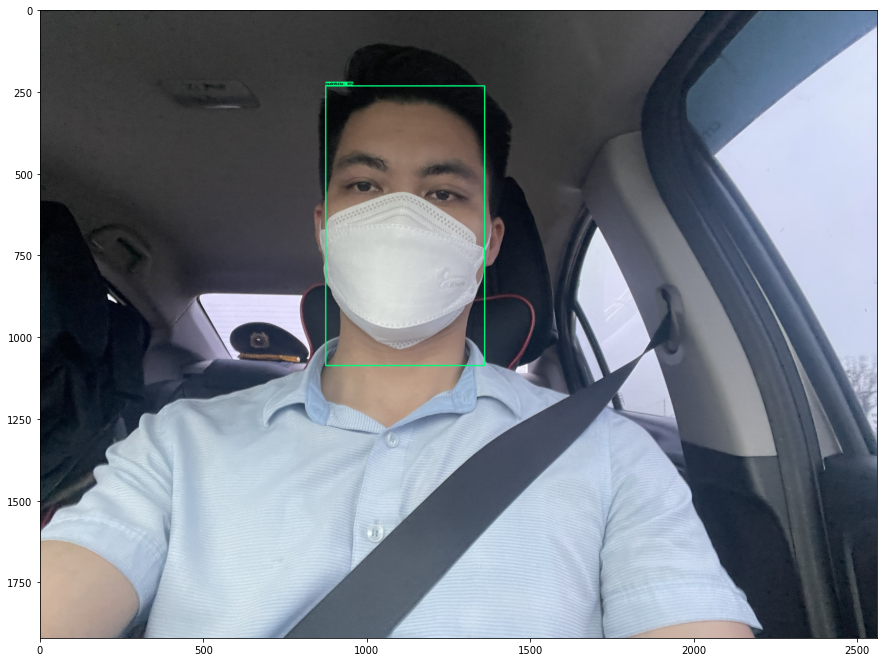

In [70]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)
#print('ok')
imgNew=cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB)
#size img
plt.figure(figsize=(15,19))

plt.imshow(imgNew)
plt.show() 

In [74]:
print(detections['detection_boxes'])
print('cl: ',detections['detection_classes']+label_id_offset)
print(detections['detection_scores'])
print(len(detections['detection_classes']+label_id_offset))

[[1.20839149e-01 3.41079950e-01 5.65695763e-01 5.31527936e-01]
 [7.85210133e-02 3.26879859e-01 6.51924849e-01 5.36152720e-01]
 [0.00000000e+00 0.00000000e+00 6.85684264e-01 5.08886218e-01]
 [0.00000000e+00 5.16014755e-01 1.00000000e+00 1.00000000e+00]
 [1.22500911e-01 3.37286621e-01 5.92579067e-01 5.27913094e-01]
 [0.00000000e+00 0.00000000e+00 7.49285221e-01 3.97328585e-01]
 [0.00000000e+00 5.16014755e-01 1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 6.36787951e-01]
 [0.00000000e+00 8.93177688e-02 7.67487288e-01 7.95165062e-01]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 9.31550026e-01]
 [6.35279179e-01 8.39215517e-03 1.00000000e+00 1.35822654e-01]
 [0.00000000e+00 8.93177688e-02 7.67487288e-01 7.95165062e-01]
 [0.00000000e+00 4.24744964e-01 7.30744839e-01 9.95475531e-01]
 [0.00000000e+00 0.00000000e+00 9.09134984e-01 4.26310778e-01]
 [0.00000000e+00 5.87053537e-01 8.54134083e-01 1.00000000e+00]
 [1.66301861e-01 3.37451011e-01 5.22283852e-01 4.851521

In [51]:
#save img to folder workspace:

from PIL import Image
img = Image.fromarray(imgNew)
img.save(paths['IMAGE_PATH']+'/log-output'+'.png')
paths['IMAGE_PATH']

'Tensorflow/workspace/images'

# 11. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [52]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (1000, 800)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 12. Freezing the Graph

In [53]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [54]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [55]:
print(command)

python Tensorflow/models/research/object_detection/exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet --output_directory=Tensorflow/workspace/models/my_ssd_mobnet/export


In [56]:
!{command}

2022-03-30 07:32:13.994759: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0330 07:32:14.319950 4636872192 deprecation.py:610] From /Users/admin/tensorflow/checkface/tfod/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = t

W0330 07:33:02.837519 4636872192 save.py:260] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalClassHead_layer_call_fn while saving (showing 5 of 104). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/export/saved_model/assets
I0330 07:33:10.219456 4636872192 builder_impl.py:779] Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/export/saved_model/assets
INFO:tensorflow:Writing pipeline config file to Tensorflow/workspace/models/my_ssd_mobnet/export/pipeline.config
I0330 07:33:11.230746 4636872192 config_util.py:253] Writing pipeline config file to Tensorflow/workspace/models/my_ssd_mobnet/export/pipeline.config


# 13. Conversion to TFJS

In [57]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 KB 385.5 kB/s eta 0:00:001m392.9 kB/s eta 0:00:01


In [58]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [59]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow/workspace/models/my_ssd_mobnet/export/saved_model Tensorflow/workspace/models/my_ssd_mobnet/tfjsexport


In [60]:
!{command}

2022-03-30 07:34:20.592524: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-30 07:34:34.142947: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2022-03-30 07:34:34.144016: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2022-03-30 07:34:34.482906: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1164] Optimization results for grappler item: graph_to_optimize
  function_optimizer: Graph size after: 3780 nodes (3370), 5053 edges (4636), time = 211.695ms.
  function_optimizer: function_optimizer did nothing. time = 0.013ms.

2022-03-30 07:34:39.705063: I t

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 14. Conversion to TFLite

In [61]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [62]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [63]:
print(command)

python Tensorflow/models/research/object_detection/export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet --output_directory=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport


In [64]:
!{command}

2022-03-30 07:35:19.998697: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-30 07:35:32.361295: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
W0330 07:35:34.960326 4484922880 save_impl.py:71] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x7f996d732a60>, because it is not built.
W0330 07:35:35.297916 4484922880 save_impl.py:71] Skipping full serialization of Keras layer <keras.layers.convolutional.SeparableConv2D object at 0x7f996d7ad850>, because it is not built.
W0330 07:35:35.298159 4484922880 save_impl.py:71] Skipping full serialization of K

W0330 07:35:56.731061 4484922880 save.py:260] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalClassHead_layer_call_fn while saving (showing 5 of 104). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model/assets
I0330 07:36:03.944920 4484922880 builder_impl.py:779] Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model/assets


In [65]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [66]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [67]:
print(command)

tflite_convert --saved_model_dir=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model --output_file=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model/detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [68]:
!{command}

2022-03-30 07:38:25.974563: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-30 07:38:40.345391: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-03-30 07:38:40.345472: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2022-03-30 07:38:40.349041: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model
2022-03-30 07:38:40.457991: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2022-03-30 07:38:40.458046: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: Tensorflo

# 15. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')